<b>Hadamard walk. </b>

Reference: "1D and 2D quantum walks with light transverse momentum", Laurea Magistrale in Fisica, Chiara Esposito. (page 6)

#### Coin operator
$C \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && 1 \\ -1 && 1 \end{pmatrix} $
 
#### Translation operator 
 $T \ =  \ \displaystyle\sum_{j} \ \lvert j \ + \ 1\rangle\langle j\lvert  \ \otimes \ \lvert R\rangle\langle R\lvert + \ \displaystyle\sum_{j} \ \lvert j \ - \ 1\rangle\langle j\lvert \otimes \ \lvert L\rangle\langle L\lvert  \$
 
#### Protocol 
$U \ = \ T (C \otimes I_p) $ 

In [1]:
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import pandas as pd
from scipy.sparse import csr_matrix

In [2]:
N = 100  # number of random steps
P = 2*N + 1   # number of positions

In [3]:
ket0 = array([1, 0])  # |0>
ket1 = array([0, 1])  # |1>

C00 = outer(ket0, ket0)  # |0><0| 
C01 = outer(ket0, ket1)  # |0><1| 
C10 = outer(ket1, ket0)  # |1><0| 
C11 = outer(ket1, ket1)  # |1><1| 

I = C00 + C11  #identity

#### Coin

$C =\frac{1}{\sqrt2} [ |0⟩_c⟨0|+|0⟩_c⟨1|-|1⟩_c⟨0|+|1⟩_c⟨1| ]$

In [4]:
#Coin
C = (C00 + C01 - C10 + C11)/sqrt(2.) #coin operator for 1 qubit

#### Translation operator 
 $T \ =  \ \displaystyle\sum_{j} \ \lvert j \ + \ 1\rangle\langle j\lvert  \ \otimes \ \lvert R\rangle\langle R\lvert + \ \displaystyle\sum_{j} \ \lvert j \ - \ 1\rangle\langle j\lvert \otimes \ \lvert L\rangle\langle L\lvert  \$

In [5]:
LPlus_ = eye(P)
LPlus_ = LPlus_.tolist()
LPluss = [row[1:] + row[:1] for row in LPlus_]
LPlus = kron(LPluss, C00)

LMinus_ = eye(P)
LMinus_ = LMinus_.tolist()
LMinuss = [row[-1:] + row[:-1] for row in LMinus_]
LMinus = kron(LMinuss, C11)

Tx = LPlus + LMinus

#### Protocol 
$U \ = \ T (I_p\otimes C) $ 

In [6]:
#Protocol
U = Tx.dot(kron(eye(P), C))

### Initial state
$|ψ⟩_0=|coin⟩_0 \otimes|posn⟩_0= \frac{1}{\sqrt2}(|0⟩c+i|1⟩c)⊗|0⟩p$

In [7]:
#Initial state
initialPosition = zeros(P)
initialPosition[N] = 1     # array indexing starts from 0, so index N is the central posn
psi0 = kron(initialPosition,(ket0+ket1*1j)/sqrt(2.))

### Final State
$|ψ⟩_N=U^{N}|ψ⟩_0$

In [8]:
#State after N random quantum steps.
psiN = linalg.matrix_power(U, N).dot(psi0) 

### Measurement operator and position on the map
$M_k=I_{c} \otimes |k⟩_p⟨k|$

In [9]:
prob = empty(P)
PositionMap=zeros([1, P])
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real
    PositionMap[0][k]= prob[k]

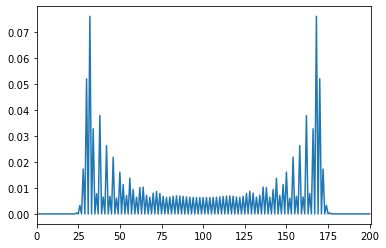

In [10]:
#Plot
fig = figure()
ax = fig.add_subplot(111)

plot(arange(P), prob)
xlim(0, P)

show()